# **Test Estaditicos**


Los tests estadísticos, también conocidos como pruebas estadísticas o pruebas de hipótesis, son herramientas utilizadas en estadística para tomar decisiones sobre las características de una población basadas en información limitada de una muestra. Estas pruebas permiten a los investigadores evaluar si una afirmación sobre una población es plausible o no, en función de la evidencia proporcionada por los datos muestrales.

Los tests estadísticos siguen un procedimiento sistemático que generalmente implica los siguientes pasos:

1. **Formulación de hipótesis:** Se establecen la hipótesis nula (H0) y la hipótesis alternativa (H1) de manera clara y precisa. La hipótesis nula suele afirmar que no hay efecto o diferencia entre grupos, mientras que la hipótesis alternativa sugiere que sí existe un efecto o diferencia.

2. **Selección de un nivel de significancia:** Se elige un nivel de significancia (α), que es la probabilidad aceptable de cometer un error tipo I al rechazar incorrectamente la hipótesis nula.

3. **Selección de la prueba estadística adecuada:** Existen diferentes pruebas estadísticas diseñadas para evaluar diferentes tipos de hipótesis y datos. La elección de la prueba adecuada depende de la naturaleza de los datos y del tipo de pregunta de investigación.

4. **Recopilación de datos y cálculo de estadísticas:** Se recolectan datos de muestra y se calculan estadísticas relevantes que ayudarán a tomar decisiones sobre la hipótesis nula.

5. **Toma de decisión:** Se utiliza la estadística calculada para comparar con el valor crítico correspondiente, o se calcula un valor p que indica la probabilidad de observar los datos muestrales si la hipótesis nula es verdadera. En función de estos resultados, se decide si se rechaza o no la hipótesis nula.

6. **Interpretación de resultados:** Se interpretan los resultados del test estadístico en el contexto del problema específico y se extraen conclusiones sobre las características de la población en estudio.

Algunos ejemplos comunes de tests estadísticos incluyen la prueba t de Student, la prueba ANOVA, la prueba chi-cuadrado, la prueba de Wilcoxon, entre otros. Estas pruebas se utilizan en una amplia variedad de campos, como la investigación científica, el análisis de datos empresariales, la ingeniería, la medicina y las ciencias sociales, entre otros, para respaldar la toma de decisiones basada en datos.

## **1. Descripcion del proyecto**

En este proyecto, nos proponemos realizar un análisis comparativo entre dos conjuntos de datos de valoraciones de películas: TMDB 5000 y MovieLens. Estos conjuntos de datos contienen valoraciones proporcionadas por diferentes usuarios para una amplia variedad de películas.

El objetivo principal del proyecto es utilizar técnicas estadísticas y herramientas de análisis de datos para determinar si existe alguna diferencia significativa entre los conjuntos de datos en términos de las valoraciones de las películas. Esto podría involucrar la comparación de medidas de tendencia central, como la media y la mediana, así como la realización de pruebas estadísticas para evaluar la significancia de cualquier diferencia observada.

Además de la comparación entre conjuntos de datos, también nos proponemos explorar la relación entre las valoraciones de películas específicas y otras variables relevantes, como el género, el año de lanzamiento o el presupuesto de producción. Esto nos permitirá obtener información adicional sobre los factores que pueden influir en la percepción de una película por parte de los usuarios.

**Configurando el ambiente**

In [55]:
# Librerias a importar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### **1.1 Datos**

**1. Movies**


El conjunto de datos "movies" contiene información sobre películas, con las siguientes características:

* **Variables:**
  * **movieId:** un identificador único para cada película, representado como un entero (int64).
  * **title:** el título de la película, almacenado como una cadena de texto (object).
  * **genres:** los géneros de la película, también almacenados como una cadena de texto (object).


In [56]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**2. Notas**


El conjunto de datos "ratings" contiene información sobre las valoraciones de películas realizadas por usuarios, con las siguientes características:

* **Variables:**
  * **userId:** Identificador único del usuario que realizó la valoración, representado como un entero.
  * **movieId:** Identificador único de la película valorada, representado como un entero.
  * **rating:** Valoración dada por el usuario a la película, almacenada como un número de punto flotante.
  * **timestamp:** Marca de tiempo de cuando se realizó la valoración, almacenada como un entero

In [57]:
notas = pd.read_csv('ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**3. TMBD 500**

El conjunto de datos "tmdb_5000" contiene información sobre películas, con las siguientes características:

* **Variables:**
  * **budget:** Presupuesto de la película, almacenado como un número entero.
  * **genres**: Géneros de la película, almacenados como cadenas de texto.
  * **homepage:** Página web oficial de la película, almacenada como cadenas de texto.
  * **id:** Identificador único de la película, almacenado como un número entero.
  * **keywords:** Palabras clave relacionadas con la película, almacenadas como cadenas de texto.
  * **original_language:** Idioma original de la película, almacenado como cadenas de texto.
  * **original_title:** Título original de la película, almacenado como cadenas de texto.
  * **overview:** Resumen o sinopsis de la película, almacenado como cadenas de texto.
  * **popularity:** Popularidad de la película, almacenada como un número de punto flotante.
  * **production_companies:** Compañías de producción de la película, almacenadas como cadenas de texto.
  * **production_countries:** Países de producción de la película, almacenados como cadenas de texto.
  * **release_date:** Fecha de lanzamiento de la película, almacenada como cadenas de texto.
  * **revenue:** Ingresos generados por la película, almacenados como un número entero.
 * **runtime:** Duración de la película en minutos, almacenada como un número de punto flotante.
  * **spoken_languages:** Idiomas hablados en la película, almacenados como cadenas de texto.
  * **status:** Estado de la película, almacenado como cadenas de texto.
  * **tagline:** Lema o eslogan de la película, almacenado como cadenas de texto.
  * **title:** Título de la película, almacenado como cadenas de texto.
  * **vote_average:** Calificación promedio de la película, almacenada como un número de punto flotante.
  * **vote_count:** Cantidad de votos recibidos por la película, almacenada como un número entero.

In [58]:
tmdb_5000 = pd.read_csv('tmdb_5000_movies.csv')
tmdb_5000.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### **1.2 Libreria a aprender**

**SciPy:** Es una biblioteca de código abierto que se basa en NumPy y proporciona una amplia variedad de algoritmos y funciones para problemas de ciencia e ingeniería. Incluye submódulos para optimización, álgebra lineal, integración, interpolación, procesamiento de señales, estadísticas y mucho más.


* **Características clave:**
  * Ofrece implementaciones eficientes de algoritmos numéricos para resolver problemas matemáticos y científicos.
  * Proporciona herramientas para realizar cálculos de integración numérica, interpolación, optimización y álgebra lineal.
  * Incluye funciones estadísticas para realizar pruebas de hipótesis, ajuste de distribuciones, generación de números aleatorios y más.

* **Aplicaciones comunes:**
  * Análisis estadístico y exploratorio de datos.
  * Modelado y simulación de sistemas físicos y biológicos.
  * Procesamiento de señales y análisis de series temporales.
  * Optimización de funciones y resolución de problemas de programación lineal y no lineal.


**StatsModels:** Es una biblioteca de Python que se centra en la estimación de modelos estadísticos y la realización de pruebas estadísticas. Proporciona clases y funciones para ajustar modelos de regresión, realizar análisis de series temporales, realizar pruebas de hipótesis y explorar datos.

* **Características clave:**
  * Permite ajustar modelos de regresión lineal y no lineal, modelos de series temporales y modelos de supervivencia.
  * Proporciona herramientas para realizar pruebas de hipótesis, análisis de varianza y análisis de la varianza de un solo factor.
  * Incluye funciones para realizar diagnósticos de ajuste de modelos y visualizar resultados.

* **Aplicaciones comunes:**
  * Análisis de datos económicos y financieros.
  * Investigación social y científica, incluida la psicología y la sociología.
  * Estudios epidemiológicos y análisis de datos de salud pública.
  * Modelado de series temporales y análisis de datos de encuestas.

Ambas bibliotecas son herramientas poderosas para realizar análisis estadísticos en Python y son ampliamente utilizadas en la comunidad científica y de datos. Si estás interesado en profundizar en estadísticas y análisis de datos, te recomendaría explorar estas bibliotecas y aprender cómo utilizarlas en tus proyectos.

### **1.3 Limpiando y visualizando TMBD 5000**

Visualizar una distribución de datos es importante por varias razones:

1. **Comprensión de los datos:** La visualización proporciona una forma intuitiva de comprender la distribución de los datos. Permite identificar patrones, tendencias, valores atípicos y cualquier otra característica importante de los datos.

2. **Comunicación efectiva:** Las visualizaciones son una herramienta poderosa para comunicar información de manera clara y efectiva a otras personas. Al presentar gráficamente la distribución de los datos, es más fácil para otros comprender la información y sacar conclusiones.

3. **Toma de decisiones informada:** Al visualizar la distribución de los datos, los analistas pueden tomar decisiones informadas basadas en evidencia. La comprensión visual de los datos facilita la identificación de problemas y la formulación de estrategias para abordarlos.

4. **Identificación de patrones y tendencias:** Las visualizaciones permiten identificar patrones y tendencias en los datos que pueden no ser evidentes al examinar solo los números. Esto puede proporcionar información valiosa para la toma de decisiones y la planificación estratégica.

5. **Detección de valores atípicos:** Las visualizaciones facilitan la detección de valores atípicos o anomalías en los datos. Estos valores inusuales pueden ser indicativos de errores en los datos o de patrones interesantes que valga la pena investigar más a fondo.

**1. displot:** Nos ayuda a crear gráficos de distribución, como histogramas, gráficos de densidad kernel y gráficos de distribución acumulada

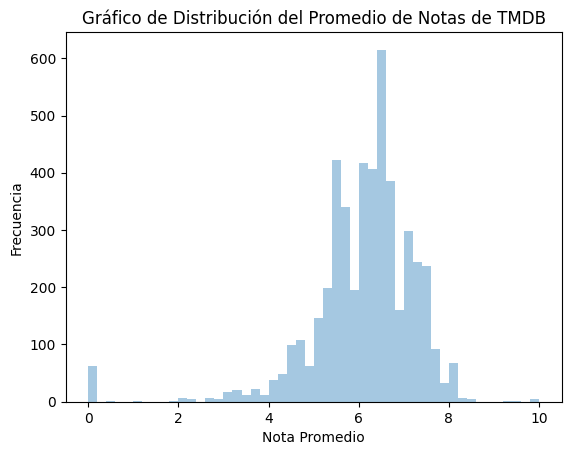

In [59]:
# Crear el gráfico de distribución de la columna 'vote_average' del dataframe tmdb_5000
ax = sns.distplot(tmdb_5000.vote_average, # Datos a visualizar
                  kde=False,              # Mostrar la estimación de la densidad del kernel
                  norm_hist=False)        # No normalizar el histograma

# Establecer etiquetas de los ejes x e y
ax.set(xlabel="Nota Promedio", ylabel="Frecuencia")

# Establecer el título del gráfico
ax.set_title("Gráfico de Distribución del Promedio de Notas de TMDB")

# Mostrar el gráfico
plt.show()

**2. Boxplot:**  Crea un diagrama de caja

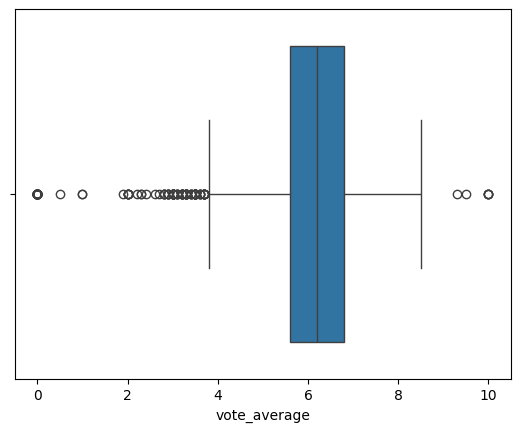

In [60]:
# Crear el gráfico de caja horizontal
sns.boxplot(tmdb_5000.vote_average, orient='h');


La importancia de limpiar los datos radica en varios aspectos cruciales para cualquier análisis de datos:

1. **Precisión y confiabilidad:** Los datos limpios garantizan que la información utilizada en el análisis sea precisa y confiable. La eliminación de errores, valores atípicos y datos inconsistentes ayuda a evitar interpretaciones erróneas y decisiones incorrectas basadas en datos defectuosos.

2. **Mejora de la calidad del análisis:** La limpieza de datos mejora la calidad del análisis al garantizar que los resultados reflejen fielmente la realidad subyacente. Esto permite que las conclusiones y las recomendaciones basadas en los datos sean más sólidas y precisas.

3. **Compatibilidad con algoritmos y modelos:** Los algoritmos de análisis de datos y los modelos de machine learning requieren datos limpios y estructurados para funcionar correctamente. La limpieza de datos prepara los datos para su procesamiento posterior, lo que facilita la aplicación de algoritmos y modelos con éxito.

4. **Aumento de la eficiencia:** Trabajar con datos limpios y bien organizados aumenta la eficiencia del proceso de análisis de datos. La limpieza inicial ahorra tiempo y esfuerzo en etapas posteriores del análisis, ya que se reduce la necesidad de corregir errores o ajustar interpretaciones incorrectas.

**Consultas:**

Nuestros dos gráficos anteriores revelan la presencia de valores atípicos significativos. Por lo tanto, procederemos a realizar consultas adicionales para determinar la naturaleza y el impacto de estos valores atípicos.

In [61]:
# Revisando los valores atipicos inferiores
tmdb_5000.query('vote_average == 0')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


Observamos que hay 63 filas con valor 0 en la columna vote_average, que representa el promedio de calificación de la película. Además, encontramos valores nulos y 0 en otras columnas. Esta situación podría afectar la distribución de las notas, por lo que es recomendable excluir estos datos para garantizar la integridad de nuestro análisis y evitar la influencia de datos incorrectos en nuestros resultados.


In [62]:
# Revisando los valores atipicos superiores
tmdb_5000.query('vote_average == 10')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


En este caso, solo tenemos 4 filas donde la columna vote_average tiene un valor de 10. Sin embargo, esto se debe a que estas películas solo han recibido un voto en total, lo que distorsiona la calificación promedio y no refleja necesariamente la calidad de la película.

Después de identificar los valores atípicos tanto inferiores como superiores en nuestros datos, es momento de establecer reglas para limpiar el dataset y eliminar estos valores que podrían afectar nuestro análisis.






**Regla 1:** Trabajar únicamente con datos en los que la columna "vote_average" tenga 10 o más votos.

In [63]:
# Filtrar el dataframe para incluir solo las películas con 10 o más votos
tmdb_10_o_mas_votos = tmdb_5000.query("vote_count >= 10")
tmdb_10_o_mas_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


**Visualizamos el filtro de 10 o más votos**

1. Distribucion normal en densidad

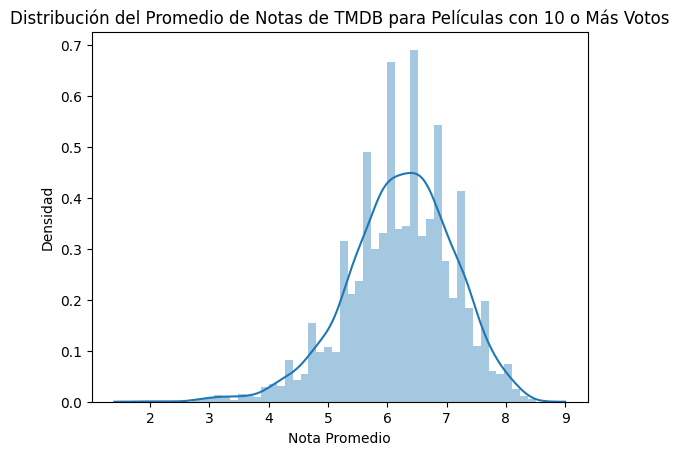

In [64]:
# Crear el gráfico de distribución de la nota promedio para películas con 10 o más votos
ax = sns.distplot(tmdb_10_o_mas_votos.vote_average)

# Establecer etiquetas de los ejes x e y
ax.set(xlabel="Nota Promedio", ylabel="Densidad")

# Establecer el título del gráfico
ax.set_title("Distribución del Promedio de Notas de TMDB para Películas con 10 o Más Votos");

2. Distribucion normal en frecuencias

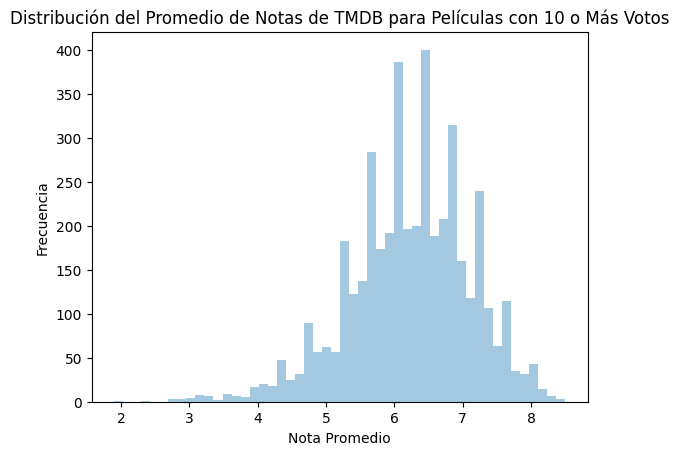

In [65]:
# Crear el gráfico de distribución del promedio de notas para películas con 10 o más votos
ax = sns.distplot(tmdb_10_o_mas_votos.vote_average, kde=False, norm_hist=False)

# Establecer etiquetas de los ejes x e y
ax.set(xlabel="Nota Promedio", ylabel="Frecuencia")

# Establecer el título del gráfico
ax.set_title("Distribución del Promedio de Notas de TMDB para Películas con 10 o Más Votos");

3. Boxblot con películas con 10 o más votos

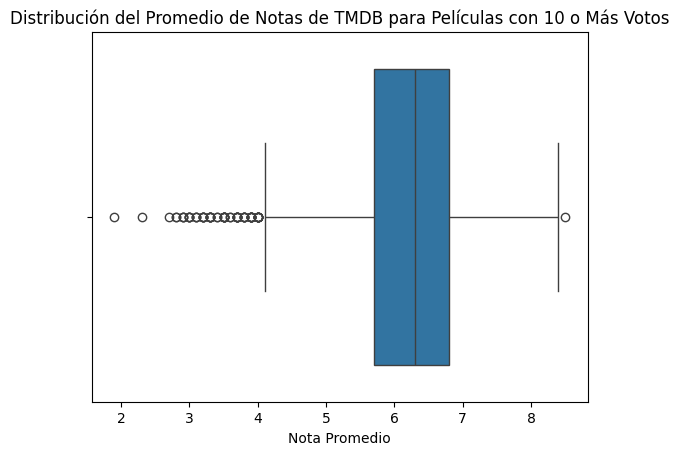

In [66]:
# Crear un gráfico de caja horizontal para el promedio de notas de películas con 10 o más votos
ax = sns.boxplot(tmdb_10_o_mas_votos.vote_average, orient='h')

# Establecer etiqueta del eje x
ax.set(xlabel="Nota Promedio")

# Establecer el título del gráfico
ax.set_title("Distribución del Promedio de Notas de TMDB para Películas con 10 o Más Votos");

### **1.4 Limpiando y visualizando movies**

In [67]:
# Visualizando nuestros datos
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [68]:
# Calcular la nota promedio por película
nota_promedio_por_pelicula = notas.groupby("movieId").mean()["rating"]

# Mostrar las primeras filas del resultado
nota_promedio_por_pelicula.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

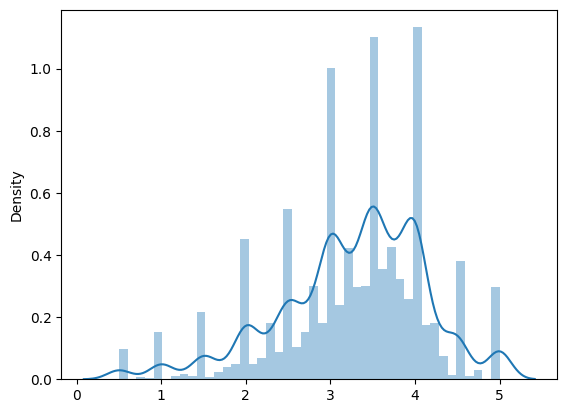

In [69]:
# Crear un gráfico de distribución de la nota promedio por película
sns.distplot(nota_promedio_por_pelicula.values);

In [70]:
# Agrupar las valoraciones por identificador de película y contar la cantidad de votos
cantidad_votos_por_pelicula = notas.groupby("movieId").count()
cantidad_votos_por_pelicula.head()

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49


In [71]:
# Filtrar las películas que tienen 10 o más votos
peliculas_10_o_mas_votos = cantidad_votos_por_pelicula.query("rating >= 10").index

peliculas_10_o_mas_votos

Int64Index([     1,      2,      3,      5,      6,      7,      9,     10,
                11,     12,
            ...
            166461, 166528, 166643, 168250, 168252, 174055, 176371, 177765,
            179819, 187593],
           dtype='int64', name='movieId', length=2269)

In [72]:
# Obtener las notas promedio de las películas con 10 o más votos
nota_promedio_por_pelicula_10_o_mas_votos = nota_promedio_por_pelicula.loc[peliculas_10_o_mas_votos.values]
nota_promedio_por_pelicula_10_o_mas_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

1. Displot para la densidad

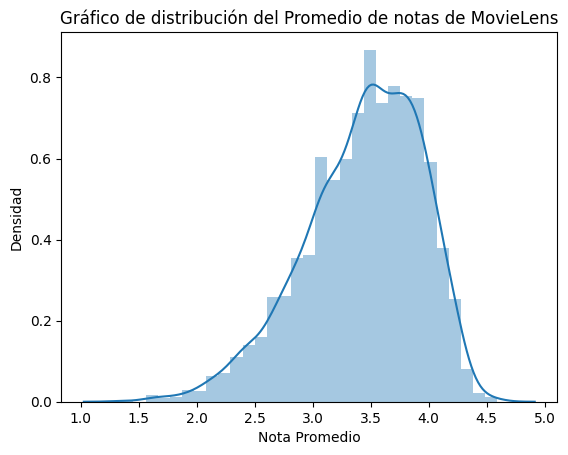

In [73]:
# Crear el gráfico de distribución de las notas promedio de películas con 10 o más votos
ax = sns.distplot(nota_promedio_por_pelicula_10_o_mas_votos.values)
ax.set(xlabel = "Nota Promedio", ylabel = "Densidad")
ax.set_title("Gráfico de distribución del Promedio de notas de MovieLens");

2. Displot para la Frecuencia

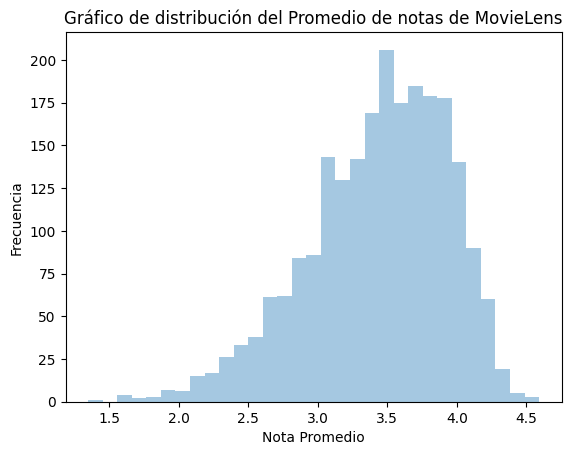

In [74]:
# Crear el gráfico de distribución de las notas promedio de películas con 10 o más votos
ax = sns.distplot(nota_promedio_por_pelicula_10_o_mas_votos.values,
                  kde=False,
                  norm_hist=False)
ax.set(xlabel="Nota Promedio", ylabel="Frecuencia")
ax.set_title("Gráfico de distribución del Promedio de notas de MovieLens");

3. Boxplot

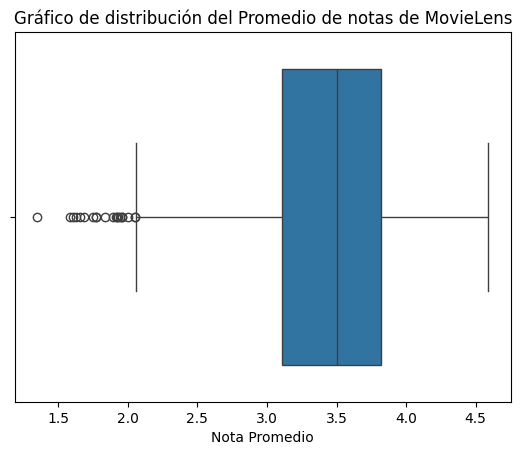

In [75]:
# Crear el gráfico de caja de las notas promedio de películas con 10 o más votos
ax = sns.boxplot(nota_promedio_por_pelicula_10_o_mas_votos.values, orient='h')
ax.set(xlabel="Nota Promedio")
ax.set_title("Gráfico de distribución del Promedio de notas de MovieLens");

## **2. Explorando la distribucion de las muestras**

Explorar la distribución de las muestras es importante porque nos permite comprender cómo están distribuidos nuestros datos. Esto nos proporciona información crucial sobre la tendencia central, la dispersión y la forma de la distribución, lo que a su vez nos ayuda a identificar patrones, detectar valores atípicos y tomar decisiones fundamentadas en análisis estadísticos. Además, nos permite verificar si los datos cumplen con ciertas suposiciones necesarias para aplicar determinadas técnicas estadísticas. En resumen, explorar la distribución de las muestras es fundamental para comprender la naturaleza de nuestros datos y realizar un análisis estadístico adecuado.

### **2.1 Visualizando la distribucion acumulada**

Este tipo de visualización nos proporciona una perspectiva sobre la acumulación gradual de valores a medida que avanzamos a lo largo de una escala. Esto nos permite comprender mejor la proporción de datos por encima o por debajo de ciertos umbrales y nos ayuda a evaluar la distribución de nuestros datos de manera más completa. Además, la distribución acumulada es útil para comparar diferentes conjuntos de datos y entender la relación entre ellos en términos de su acumulación relativa. En resumen, visualizar la distribución acumulada nos brinda información importante sobre la distribución de nuestros datos y nos ayuda a tomar decisiones informadas en análisis estadísticos.

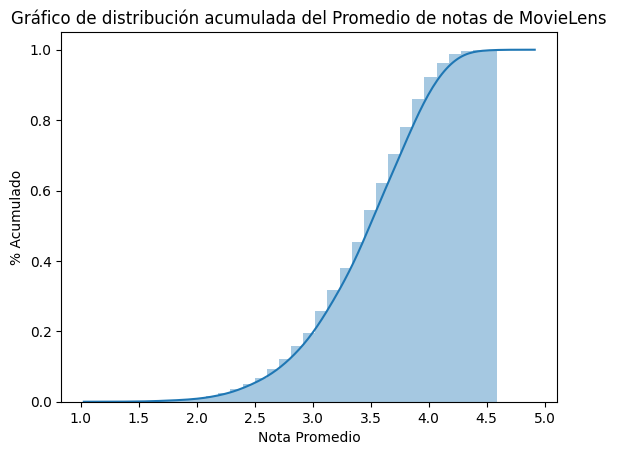

In [76]:
# Crear el gráfico de distribución acumulada de las notas promedio de películas con 10 o más votos
ax = sns.distplot(nota_promedio_por_pelicula_10_o_mas_votos.values,
                  hist_kws={"cumulative": True},
                  kde_kws={"cumulative": True})
ax.set(xlabel="Nota Promedio", ylabel="% Acumulado")
ax.set_title("Gráfico de distribución acumulada del Promedio de notas de MovieLens");

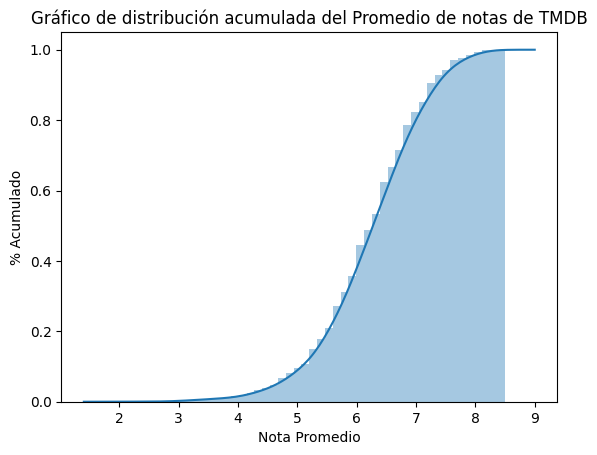

In [77]:
# Crear el gráfico de distribución acumulada de las notas promedio de películas de TMDB con 10 o más votos
ax = sns.distplot(tmdb_10_o_mas_votos.vote_average,
                  hist_kws={"cumulative": True},
                  kde_kws={"cumulative": True})
ax.set(xlabel="Nota Promedio", ylabel="% Acumulado")
ax.set_title("Gráfico de distribución acumulada del Promedio de notas de TMDB");

### **2.2 Analizando otras variables**

#### **Grafico de Distribucion**

* **vote_count:** Cantidad de votos recibidos por la película, almacenada como un número entero.

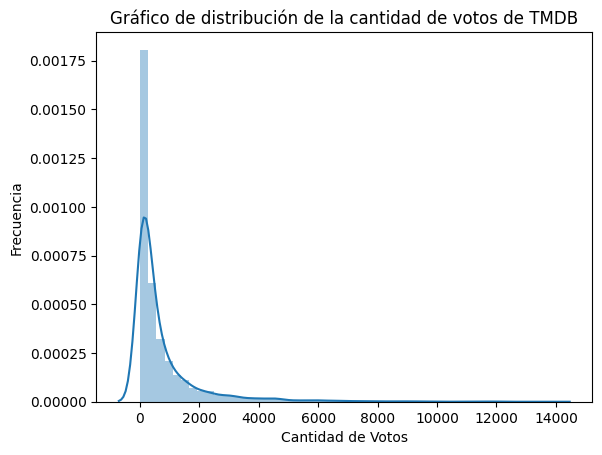

In [78]:
# Crear el gráfico de distribución de la cantidad de votos de TMDB con 10 o más votos
ax = sns.distplot(tmdb_10_o_mas_votos.vote_count)
ax.set(xlabel="Cantidad de Votos", ylabel="Frecuencia")
ax.set_title("Gráfico de distribución de la cantidad de votos de TMDB");

* **budget:** Presupuesto de la película, almacenado como un número entero.


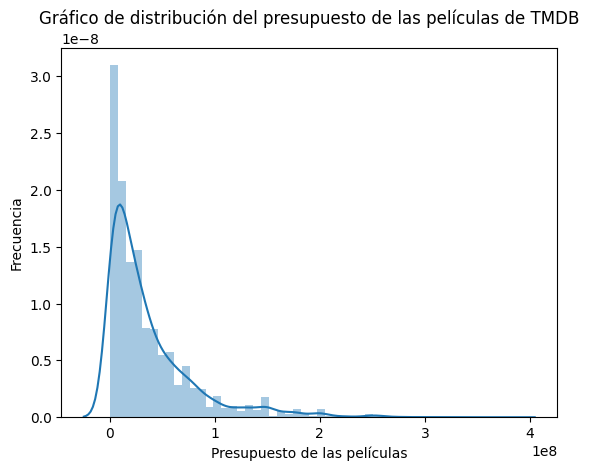

In [79]:
# Crear el gráfico de distribución del presupuesto de las películas de TMDB con presupuesto mayor que cero
ax = sns.distplot(tmdb_5000.query("budget > 0").budget)
ax.set(xlabel="Presupuesto de las películas", ylabel="Frecuencia")
ax.set_title("Gráfico de distribución del presupuesto de las películas de TMDB");

* **popularity:** Popularidad de la película, almacenada como un número de punto flotante.
  

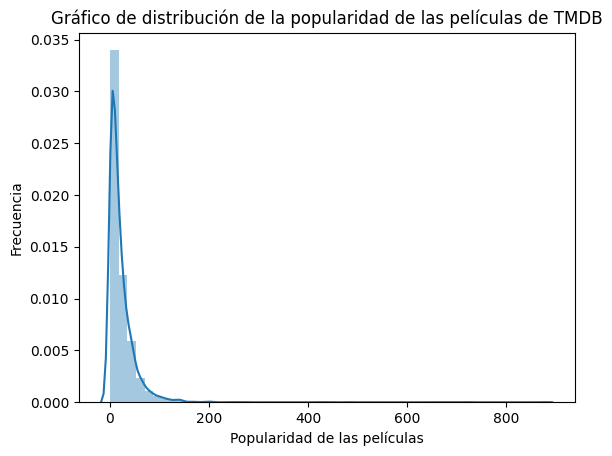

In [80]:
# Crear el gráfico de distribución de la popularidad de las películas de TMDB
ax = sns.distplot(tmdb_5000.popularity)
ax.set(xlabel="Popularidad de las películas", ylabel="Frecuencia")
ax.set_title("Gráfico de distribución de la popularidad de las películas de TMDB");

* **runtime:** Duración de la película en minutos, almacenada como un número de punto flotante.


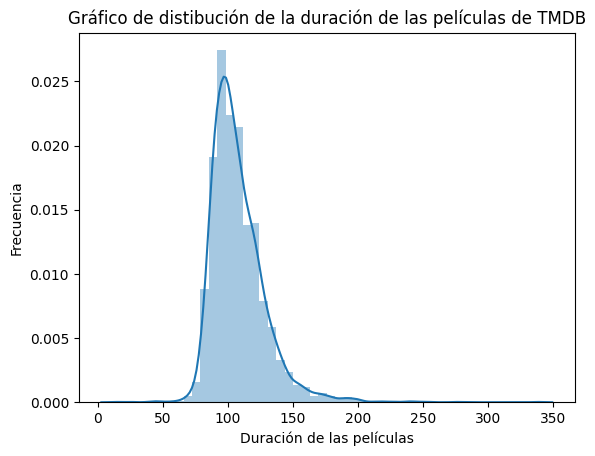

In [81]:
# Crear el gráfico de distribución de la duración de las películas de TMDB
ax = sns.distplot(tmdb_5000.query("runtime > 0").runtime.dropna())
ax.set(xlabel="Duración de las películas", ylabel="Frecuencia")
ax.set_title("Gráfico de distibución de la duración de las películas de TMDB");

#### **Gráfico de distribución acumulada**

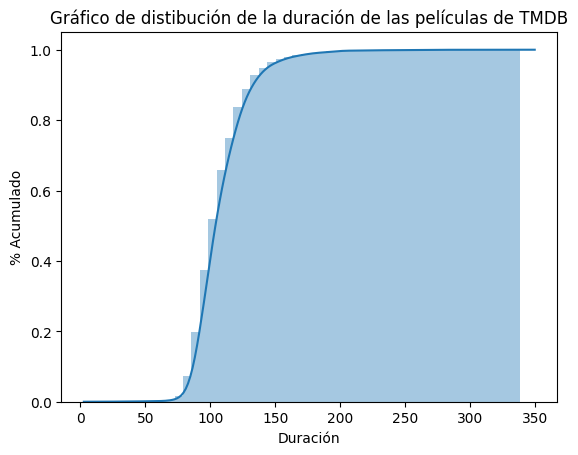

In [82]:
# Crear el gráfico de distribución acumulada de la duración de las películas de TMDB
ax = sns.distplot(tmdb_5000.query("runtime > 0").runtime.dropna(),
                  hist_kws={"cumulative": True},
                  kde_kws={"cumulative": True})
ax.set(xlabel="Duración", ylabel="% Acumulado")
ax.set_title("Gráfico de distibución de la duración de las películas de TMDB");

In [83]:
# Calcular el percentil 80 de la duración de las películas de TMDB
percentil_80 = tmdb_5000.query("runtime > 0").runtime.dropna().quantile(0.8)
percentil_80

121.0

## **3. Test de una muestra**









Un test de una muestra es una técnica estadística utilizada para evaluar si la media de una muestra es significativamente diferente de cierto valor de referencia o de la media de una población conocida. Estos tests se utilizan para tomar decisiones sobre si aceptar o rechazar una hipótesis sobre la media poblacional basada en la muestra recopilada.

Los tests de una muestra son fundamentales en la investigación científica y en la toma de decisiones en diversos campos, ya que permiten evaluar afirmaciones sobre poblaciones utilizando datos muestrales limitados.

### **3.1 Efecto del tamaño de una muestra**

El tamaño de la muestra juega un papel crucial en la inferencia estadística y puede tener un efecto significativo en los resultados de un estudio o experimento. Aquí hay algunos efectos importantes del tamaño de la muestra:

1. **Precisión de la estimación:** En general, cuanto mayor sea el tamaño de la muestra, mayor será la precisión de las estimaciones de los parámetros poblacionales. Esto se debe a que una muestra más grande proporciona más información sobre la población y reduce la variabilidad de las estimaciones.

2. **Intervalos de confianza más estrechos:** Un tamaño de muestra más grande conduce a intervalos de confianza más estrechos alrededor de las estimaciones de los parámetros. Esto significa que tenemos más confianza en la precisión de nuestras estimaciones cuando el tamaño de la muestra es grande.

3. **Mayor poder estadístico:** El poder estadístico de una prueba de hipótesis, que es la probabilidad de rechazar correctamente la hipótesis nula cuando es falsa, aumenta con el tamaño de la muestra. Esto significa que una muestra más grande es más capaz de detectar efectos reales o diferencias significativas.

4. **Menor margen de error:** Con un tamaño de muestra más grande, el margen de error de una estimación se reduce. Esto significa que las estimaciones son más cercanas al valor real del parámetro poblacional.

5. **Mayor sensibilidad a efectos pequeños:** Con una muestra más grande, es más probable que se detecten efectos pequeños o diferencias entre grupos. Esto es especialmente importante en estudios de investigación donde se buscan efectos sutiles.

6. **Costos y recursos:** Sin embargo, es importante considerar que obtener una muestra grande puede ser costoso en términos de tiempo, dinero y recursos. Por lo tanto, es necesario encontrar un equilibrio entre el tamaño de la muestra y los recursos disponibles.

El tamaño de la muestra tiene un impacto significativo en la calidad y la confiabilidad de los resultados de un estudio estadístico. Es importante seleccionar un tamaño de muestra adecuado que proporcione resultados precisos y confiables sin desperdiciar recursos innecesarios.

In [92]:
# Calcular la media de las notas promedio de las películas con 10 o más votos en MovieLens
media_notas_10_o_mas_votos = nota_promedio_por_pelicula_10_o_mas_votos.mean()
print('La media de las notas en peliculas con mas de 10 votos es: ',media_notas_10_o_mas_votos.round(2))

# Calcular la cantidad de películas con 10 o más votos en MovieLens
cantidad_peliculas_10_o_mas_votos = len(nota_promedio_por_pelicula_10_o_mas_votos)
print('La cantidad de  peliculas con mas de 10 votos es de: ',cantidad_peliculas_10_o_mas_votos)

# Calcular la media de las primeras 5 películas con 10 o más votos en MovieLens
media_primeras_cinco_peliculas = nota_promedio_por_pelicula_10_o_mas_votos[0:4].mean()
print('La media de las primeras 5 es de: ',media_primeras_cinco_peliculas.round(2))

La media de las notas en peliculas con mas de 10 votos es:  3.43
La cantidad de  peliculas con mas de 10 votos es de:  2269
La media de las primeras 5 es de:  3.42


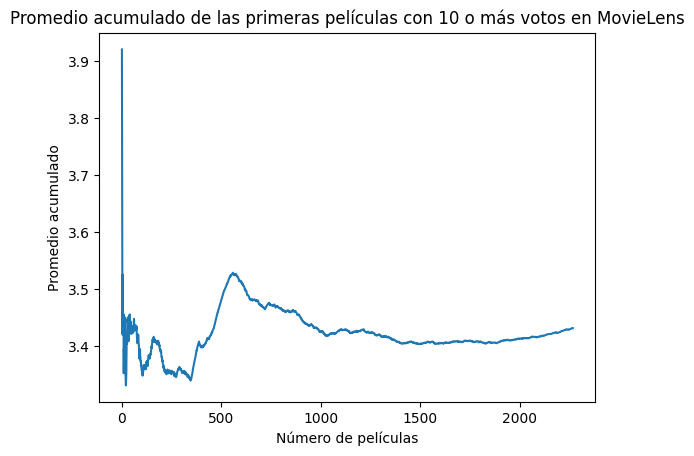

In [94]:
# Calcular los promedios acumulados de las películas con 10 o más votos en MovieLens
promedios = []
for i in range(1, len(nota_promedio_por_pelicula_10_o_mas_votos)):
    promedios.append(nota_promedio_por_pelicula_10_o_mas_votos[0:i].mean())

# Graficar los promedios acumulados
plt.plot(promedios)
plt.xlabel('Número de películas')
plt.ylabel('Promedio acumulado')
plt.title('Promedio acumulado de las primeras películas con 10 o más votos en MovieLens')
plt.show()

La conclusión que podemos extraer aquí es que el tamaño de la muestra juega un papel crucial en la fiabilidad de nuestras conclusiones. Cuando nuestra muestra es pequeña, existe una mayor probabilidad de llegar a conclusiones erróneas. Sin embargo, a medida que el tamaño de la muestra aumenta, observamos una tendencia hacia una mayor estabilidad en nuestros resultados.

Por ejemplo, al analizar el gráfico, notamos que a partir de alrededor de 500 registros, la variabilidad en las conclusiones comienza a disminuir. Esta tendencia se refuerza aún más a medida que aumentamos el tamaño de la muestra, alcanzando una mayor estabilidad y consistencia en nuestros datos aproximadamente a partir de los 1000 registros.

Este fenómeno se debe a que con un mayor tamaño de muestra, los datos tienden a ser más representativos de la población subyacente. Como resultado, la adición de un nuevo registro tiene un impacto menos significativo en el promedio general, lo que lleva a conclusiones más sólidas y consistentes.

Es importante señalar que, aunque observamos esta tendencia en el gráfico, es fundamental tener en cuenta que la organización y el orden de los datos pueden influir en nuestros resultados. Por lo tanto, es crucial comprender cómo se han recopilado y estructurado los datos para interpretar adecuadamente los hallazgos.

Para validar si el comportamiento de la distribución se mantiene cuando aleatorizamos el orden de los datos, utilizaremos la biblioteca NumPy. Para garantizar la reproducibilidad de los resultados, estableceremos una semilla aleatoria utilizando random.seed. Esto nos asegura que cada vez que ejecutemos el código, obtendremos el mismo orden aleatorio de los datos.

Luego, utilizaremos la función sample de NumPy para reordenar nuestros datos. Al pasar el parámetro frac=1, indicamos que queremos reordenar todos los elementos de nuestra variable. Guardaremos el resultado en una variable temporal llamada temp.

Al visualizar el gráfico de la distribución después de aleatorizar el orden de los datos, observaremos si el comportamiento general se mantiene o si hay cambios significativos en la estabilidad de la distribución.

Veamos cómo implementar esto a continuación:

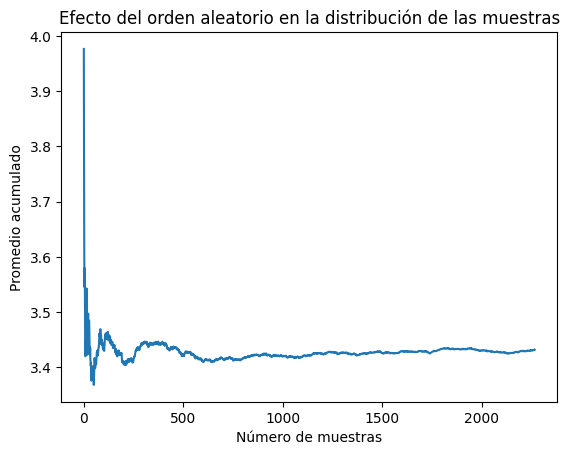

In [95]:
# Fijar la semilla aleatoria para reproducibilidad
np.random.seed(75241)

# Aleatorizar el orden de los datos
temp = nota_promedio_por_pelicula_10_o_mas_votos.sample(frac=1)

# Calcular los promedios acumulados
promedios_aleatorios = [temp[0:i].mean() for i in range(1, len(temp))]

# Visualizar el gráfico de los promedios acumulados
plt.plot(promedios_aleatorios)
plt.xlabel('Número de muestras')
plt.ylabel('Promedio acumulado')
plt.title('Efecto del orden aleatorio en la distribución de las muestras')
plt.show()

Aquí podemos observar una diferencia en la estabilización de la distribución de los promedios acumulados entre los dos conjuntos de datos. En el caso del primer conjunto, la estabilización ocurre a partir del número 1000 de muestras, mientras que en el segundo conjunto, la estabilización se observa más temprano, a partir del número 500.

Este hallazgo resalta la importancia del tamaño de la muestra en el análisis de datos. Además, nos recuerda que el orden de los datos también puede influir en la estabilidad de la distribución. Por ejemplo, si los datos están ordenados de manera no aleatoria, existe un mayor riesgo de tomar decisiones erradas. Por lo tanto, es crucial considerar detalles como el orden de los datos al analizar la tendencia y consistencia de los datos.

### **3.2 Analizando Tests Estadísitcos Z Test - T Test**

Los tests estadísticos Z y T son herramientas fundamentales en el análisis de datos para evaluar hipótesis y tomar decisiones basadas en evidencia estadística. Ambos tests son utilizados para comparar medias entre dos muestras o entre una muestra y una población, pero tienen algunas diferencias clave en cuanto a su aplicación y suposiciones subyacentes.

El Z-test es adecuado cuando se conoce la desviación estándar poblacional y el tamaño de la muestra es grande (generalmente más de 30 observaciones). Se utiliza para probar si la media de una muestra es significativamente diferente de la media poblacional conocida. Este test se basa en la distribución normal estándar y puede proporcionar resultados precisos cuando se cumplen sus suposiciones.

Por otro lado, el T-test es más flexible y se utiliza cuando la desviación estándar poblacional es desconocida o el tamaño de la muestra es pequeño (generalmente menos de 30 observaciones). Hay dos tipos principales de T-test: el T-test para muestras independientes y el T-test para muestras pareadas. El T-test para muestras independientes compara las medias de dos grupos independientes, mientras que el T-test para muestras pareadas compara las medias de un mismo grupo en dos momentos diferentes.

Ambos tests generan un valor p, que indica la probabilidad de obtener resultados tan extremos como los observados si la hipótesis nula (generalmente la igualdad de medias) fuera cierta. Si el valor p es menor que un umbral predefinido (generalmente 0.05), se rechaza la hipótesis nula y se concluye que hay una diferencia significativa entre las medias.

In [97]:
media = nota_promedio_por_pelicula_10_o_mas_votos.mean()
media.round(2)

3.43


Hasta este punto, hemos aprendido a estudiar y analizar nuestra muestra, comprendiendo la importancia del tamaño y la aleatorización de los datos. También hemos destacado la relevancia de regularizar nuestros datos y la muestra que estamos utilizando. Sin embargo, hemos enfatizado repetidamente que los datos encontrados hasta ahora no representan el universo en su totalidad.

Por lo tanto, **¿cómo podemos concluir o determinar si los datos encontrados en nuestra muestra son representativos del universo?** Para abordar este desafío, recurrimos a los intervalos de confianza y a los tests estadísticos, que son herramientas fundamentales en el análisis estadístico.

Un intervalo de confianza es un rango de valores que nos permite extrapolar los resultados de nuestra muestra al universo. Es peligroso asumir que un valor específico encontrado en nuestra muestra representa fielmente el universo. Por lo tanto, los intervalos de confianza nos proporcionan un rango de valores con una aceptabilidad estadística, dentro del cual podemos afirmar con cierto grado de confianza que se encuentra el verdadero valor del universo.

Existen varios tests estadísticos que se pueden aplicar, cada uno con sus propias particularidades. Inicialmente, nos enfocaremos en dos tests que son adecuados para distribuciones normales: el Z-test y el T-test. Dado que hemos observado que los datos del promedio de las notas de MovieLens tienen una distribución aproximadamente normal, continuaremos nuestro análisis utilizando estas pruebas estadísticas.

* **Z-Test: zconfint**

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.zconfint.html

In [103]:
from statsmodels.stats.weightstats import zconfint
intervalos = zconfint(nota_promedio_por_pelicula_10_o_mas_votos)

print(' Los intervalos de confianza usando Z-Test son de: ', intervalos)

 Los intervalos de confianza usando Z-Test son de:  (3.4112459477469557, 3.452854733323563)


Entonces, **¿cuál es la interpretación correcta de este intervalo de confianza?** Significa que tenemos un 95% de confianza de que si seleccionamos aleatoriamente un dato del universo, su valor estará dentro de este intervalo, que va desde 3.41 hasta 3.45. Ahora, procederemos a realizar el mismo análisis utilizando el test T. Cabe destacar que cada test tiene sus particularidades, pero en términos generales, se recomienda utilizar el Z-test cuando se trabaja con grandes volúmenes de datos y distribuciones normales, como hemos visto hasta ahora. Por otro lado, el test T se utiliza preferiblemente cuando se dispone de un número menor de muestras.







* **T-Test: DescrStatsW**

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [104]:
from statsmodels.stats.weightstats import DescrStatsW
intervalos = DescrStatsW(nota_promedio_por_pelicula_10_o_mas_votos)
intervalos = intervalos.tconfint_mean()

print(' Los intervalos de confianza usando T-Test son de: ', intervalos)

 Los intervalos de confianza usando T-Test son de:  (3.411234839229381, 3.4528658418411395)


Entonces eso es los intervalos de confianza. Son súper importantes para extrapolar inferir datos que tenemos con una muestra y analizar y llevarlos a un mundo real al universo.

## **4. Otros Tests Estadisticos**





### **4.1 Test para una muestra: Z-Test**

* media = 3.43
* intervalos(3.41,3.45)

In [106]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [107]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [109]:
notas1 = notas.query("movieId == 1")
notas1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


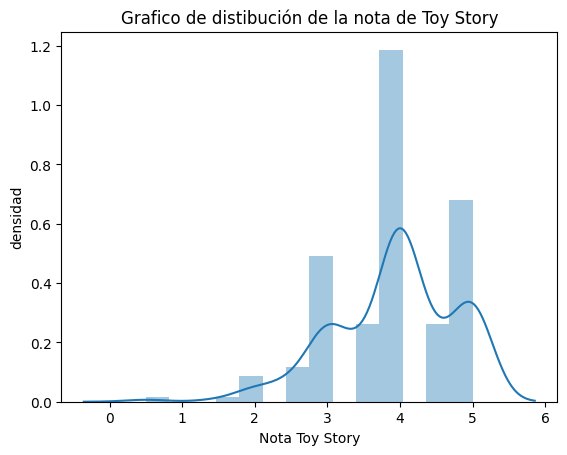

In [111]:
ax = sns.distplot(notas1.rating)
ax.set(xlabel = "Nota Toy Story", ylabel = "densidad")
ax.set_title("Grafico de distibución de la nota de Toy Story");

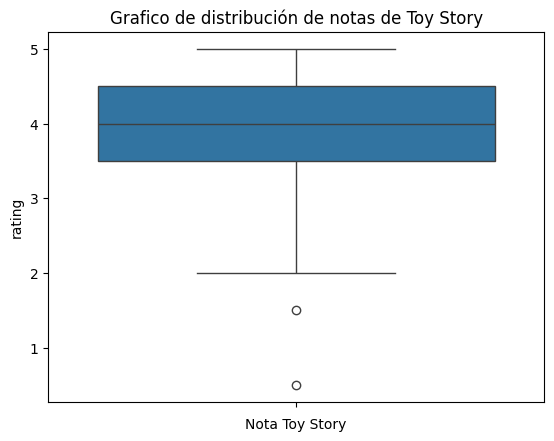

In [112]:
ax = sns.boxplot(notas1.rating)
ax.set(xlabel = "Nota Toy Story")
ax.set_title("Grafico de distribución de notas de Toy Story");

 Visualmente podemos decir de que las notas de Toy Story son mejores que las notas del promedio general, que las notas de todas las películas. Pero también no podemos olvidarnos que puede haber un sesgo muestral, o sea, un problema al haber seleccionado la muestra. Esa muestra de Toy Story podría estar sesgada porque los usuarios que dieron son de una ciudad específica o son de una familia específica, ya estudiamos diferentes formas.

Para validar esa información también existen tests en los cuales podemos comparar y concluir, inferir si eso es realmente válido en el universo, mirando todas las películas y comparando con todas las personas que miraron Toy Story

In [120]:
print('El intervalo de confianza para Toy Story es: ', zconfint(notas1.rating))

El intervalo de confianza para Toy Story es:  (3.8093359183563402, 4.032524546759939)


¿Entonces, cuál sería la lectura correcta? Otra vez con un 95% en nivel de confianza, si seleccionamos aleatoriamente cualquier persona que votó en el universo, de la muestra por Toy Story, con 95% de confianza, va a caer entre 3.81 y 4.03. Ahora, el intervalo de confianza también es mayor que el intervalo de confianza de las notas en general.

In [125]:
from statsmodels.stats.weightstats import ztest
p_valor = ztest(notas1.rating,nota_promedio_por_pelicula_10_o_mas_votos)[1]


print('La compracion de las notas de Toy Story con el promedio de todas la notas es de: ', p_valor)

La compracion de las notas de Toy Story con el promedio de todas la notas es de:  1.2422593409480636e-36


In [126]:
p_valor < 0.05

True

Entonces, cuando nuestro pvalue es menor que nuestro valor de alpha, rechazamos nuestra hipótesis. ¿Cuál era nuestra hipótesis? Decir que Toy Story tenia el mismo promedio de notas que l peliculas en general. Entonces no son iguales. Aquí es que podemos concluir que:
* Al no ser iguales, al rechazar nuestra hipótesis nula, consideramos que la media de Toy Story TS es mayor que la media de las películas en general.

### **4.2 Problemas con muestras pequeñas: Z-Test**


* Usando Toy Story

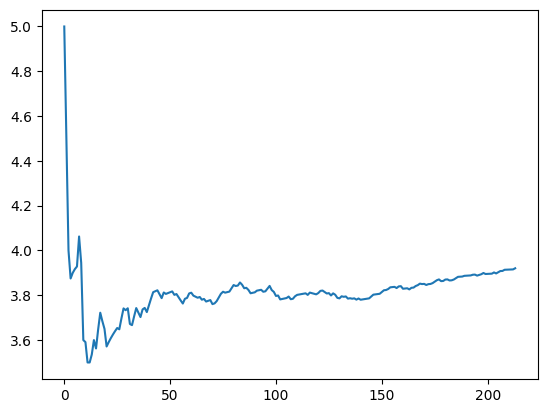

In [127]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating
promedios = list()
for i in range(1,len(temp)):
   promedios.append(temp[0:i].mean())

promedios

plt.plot(promedios);

Podemos ver que antes del 50 efectivamente tenemos una variación muy grande. Empieza con casi 5, baja, sube, baja, tiene otras oscilaciones y a partir de 50 podemos ver que se estabiliza un poco y a partir de las 150 comienza a subir nuevamente.

Entonces podemos ver de que por ejemplo, si se hubiera seleccionado una muestra pequeña, menor a 50, el promedio hasta aquí es muy bajo 3.6, diferente del promedio general que nos ha dado, más abajo del promedio general que nos ha dado en Toy Story

Ahora lo que vamos a hacer es vamos a comparar usando Z test, el test que vimos anteriormente, con cada uno de los promedios calculados para cada etapa.

 O sea, vamos a calcular Z test con dos muestras, el Z test con tres muestras, el Z test con 4, y así sucesivamente, y vamos a comparar nuestra muestra de notas1, que es Toy Story, con el valor del promedio de las notas generales para calcular el P value y ver el impacto que tenemos con el número de muestras.

In [132]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating
promedios = list()

def calcula_test(i):
  media = temp[0:i].mean()
  _, p_valor = ztest(temp[0:i],value = 3.4320503405352603)
  return(i,p_valor,media)

for i in range(2,len(temp)):
   promedios.append(calcula_test(i))

promedios

[(2, 0.032687621135204896, 4.5),
 (3, 0.3252543510880489, 4.0),
 (4, 0.29952196979944745, 3.875),
 (5, 0.15826781784711086, 3.9),
 (6, 0.07406936464331344, 3.9166666666666665),
 (7, 0.03058372185045264, 3.9285714285714284),
 (8, 0.008546846816661634, 4.0625),
 (9, 0.034351369792154834, 3.9444444444444446),
 (10, 0.6797757440816464, 3.6),
 (11, 0.6661040559180447, 3.590909090909091),
 (12, 0.8452594429449549, 3.5),
 (13, 0.8319722700425317, 3.5),
 (14, 0.7285036535608292, 3.5357142857142856),
 (15, 0.5561564945645507, 3.6),
 (16, 0.6284166359766319, 3.5625),
 (17, 0.42056196093078513, 3.6470588235294117),
 (18, 0.2692718087435868, 3.7222222222222223),
 (19, 0.3157395629293568, 3.6842105263157894),
 (20, 0.36558117183067695, 3.65),
 (21, 0.5650170364597873, 3.5714285714285716),
 (22, 0.4930885087384419, 3.590909090909091),
 (23, 0.4265824656611449, 3.608695652173913),
 (24, 0.36578337526912086, 3.625),
 (25, 0.3108287352909964, 3.64),
 (26, 0.26171758950670954, 3.6538461538461537),
 (27,

¿Qué me retorna? Me retorna en este caso son una lista con dos valores. En esta lista con dos valores, tenemos en el primer valor el p_valor y en el segundo lugar, la media.

In [133]:
# Ahora, para graficar eso, necesitamos atribuirlo a un array. Vamos atribuirlo usando NumPy
valores = np.array(promedios)

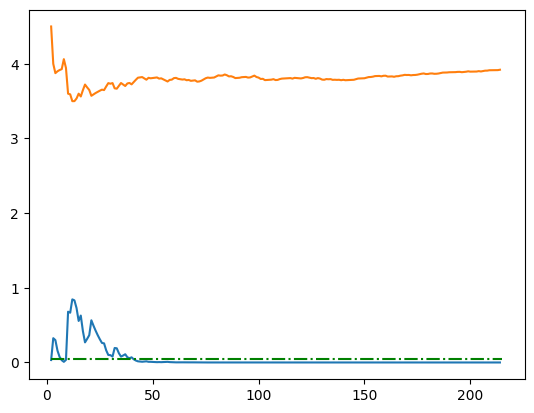

In [138]:
# promedio
plt.plot(valores[:,0],valores[:,1])
# p_valor
plt.plot(valores[:,0],valores[:,2])
plt.hlines(y = 0.05, xmin = 2, xmax = len(temp), colors = "g", linestyles= "dashdot");

En los primeros números, en los primeros 50 registros, ahí tenemos la oscilación. Todavía tenemos esa oscilación bastante fuerte de valores de los promedios de las medias, de las notas de Toy Story. Y también muestra la oscilación en el P value, en los primeros 50 valores.

En los primeros 40 valores tenemos p values encima de nuestro alpha.

 ¿Cuál es el riesgo de si teníamos una muestra pequeña? Hacer el Z test, íbamos a aceptar en este caso la hipótesis nula que decíamos que el valor de nuestra media es igual, el valor de la media de Toy Story. Entonces ese es el riesgo de tener muestras pequeñas donde podríamos tomar decisiones erradas.

## **5. Tests para dos muestras**

El test para dos muestras es una herramienta estadística utilizada para comparar las medias de dos grupos diferentes y determinar si existen diferencias significativas entre ellos. Este tipo de test es útil en diversas situaciones, como en estudios clínicos para comparar el efecto de dos tratamientos diferentes, en estudios de mercado para analizar la respuesta de dos grupos de consumidores a diferentes estímulos, o en investigación social para evaluar las diferencias en actitudes o comportamientos entre dos poblaciones.

Existen varios tipos de test para dos muestras, cada uno diseñado para abordar diferentes escenarios y condiciones de los datos. Algunos de los más comunes incluyen:

1. **Test t de Student para muestras independientes:** Este test se utiliza cuando las muestras son independientes entre sí, es decir, no están relacionadas de ninguna manera. Se utiliza para comparar las medias de dos grupos diferentes y determinar si las diferencias observadas son estadísticamente significativas.

2. **Test t de Student para muestras relacionadas:** También conocido como test t pareado, este test se utiliza cuando las muestras están relacionadas o emparejadas de alguna manera, como en estudios de pre y post tratamiento o en estudios de casos y controles. Se utiliza para comparar las medias de dos grupos emparejados y determinar si las diferencias observadas son significativas.

3. **Test de Mann-Whitney U:** Este test se utiliza cuando los datos no siguen una distribución normal o cuando las muestras son pequeñas. Se basa en los rangos de los datos y es una alternativa no paramétrica al test t de Student para muestras independientes.

4. **Test de Wilcoxon:** Similar al test de Mann-Whitney U, este test se utiliza para comparar las medias de dos grupos cuando los datos no siguen una distribución normal o cuando las muestras están relacionadas. Es una alternativa no paramétrica al test t de Student para muestras relacionadas.

### **5.1 Comparamdo la media de dos muestras**

Vamos ha comparar la distribución de un conjunto de datos con la distribución de otro conjunto de datos, que en este caso va a ser la distribución de nuestro conjunto de datos notas1.rating con notas.rating

In [141]:
print('El intervalo de confianza es de: ',zconfint(notas1.rating,notas.rating))

El intervalo de confianza es de:  (0.2799245129192442, 0.5588219849631111)


El intervalo de confianza nos dice que hay un intervalo de de 0.2799 a 0.5588 de que las notas 1, en este caso las notas de Toy Story son mayores en ese rango que las notas en general

También podemos hacer el ztest para ver el P value, en el cual nuestra hipótesis nula va a ser que notas1.rating son iguales a notas1.rating.

Entonces, cuando hacemos el ztest nuestra hipótesis, que la media de esta distribución es igual a la media de esta distribución.

In [143]:
p_valor = ztest(notas1.rating,notas.rating)[1]
p_valor

3.762112778881965e-09

In [144]:
p_valor < 0.05

True

Entonces rechazamos esa hipótesis porque el p_valor es menor que 0.05 que es nuestro valor de alpha.

* **T-test**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [146]:
from scipy.stats import ttest_ind
p_valor = ttest_ind(notas1.rating,notas.rating)[1]

p_valor

3.774003138720876e-09

 Y tenemos que un valor parecido al de ztest donde descartamos la hipótesis de que las medias de las distribuciones no son iguales.

* Comparando los dos conjuntos de datos

In [149]:
from statsmodels.stats.weightstats import DescrStatsW

descr_todas_las_notas = DescrStatsW(notas.rating)
descr_toy_story = DescrStatsW(notas1.rating)

comparacion = descr_todas_las_notas.get_compare(descr_toy_story)

comparacion.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


¿Qué es lo que tenemos? El P value, el valor de nuestro estadístico, y el P value menor que cero.

 ### **5.2 Visualizando graficamente - muestras pequeñas**

Vamos a graficar un gráfico de boxplot con las dos distribuciones, con los dos conjuntos de datos, notas.rating que es nuestro conjunto de datos general y las notas de Toy Story, en nuestro caso.

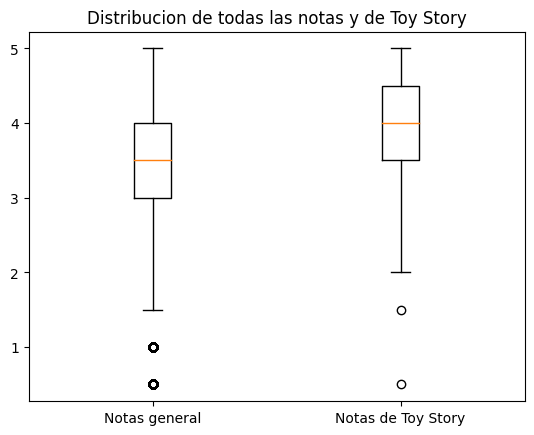

In [150]:
plt.boxplot([notas.rating,notas1.rating],labels = ["Notas general", "Notas de Toy Story"])
plt.title("Distribucion de todas las notas y de Toy Story");

Pero una debilidad, podríamos llamarlo así del gráfico de boxplot es que no podemos ver la cantidad de datos que tenemos aquí, que no sabemos si en notas generales este gráfico representa 1000, 500, 200 muestras y lo mismo en Toy Story, no sabemos si son 1000, 500, 600.

 Imagínense que solo tuviéramos pocos datos de Toy Story como por ejemplo del 3 al 12, o sea que tengamos el registro 3 al registro 12 y la distribución de todas las notas.

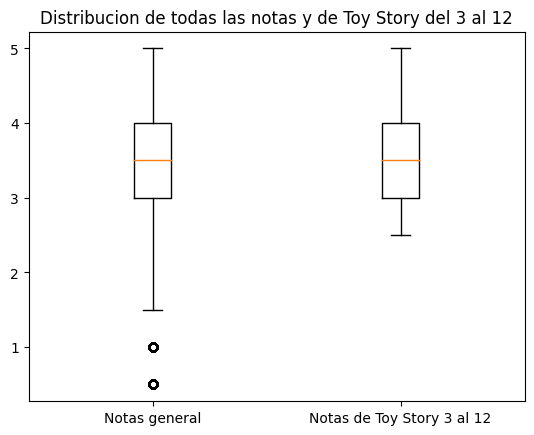

In [152]:
plt.boxplot([notas.rating,notas1[3:12].rating],labels = ["Notas general", "Notas de Toy Story 3 al 12"])
plt.title("Distribucion de todas las notas y de Toy Story del 3 al 12");

¿Qué es lo que pasa? Nos muestra distribuciones parecidas con medias, promedio bien parecidos, y aquí podemos llegar a una conclusión errónea, errada diciendo de que el promedio general de Toy Story es igual al promedio de todas las notas, solo que nuestro conjunto de datos de Toy Story son pocos registros, tenemos de 3 al 12, son prácticamente 9 registros en este conjunto de datos.

Vamos a comparar esos dos conjuntos de datos ahora en una forma numérica, cuantitativa

Y diciéndole que me use el test estadístico T. ¿Por qué el test estadístico T? Reforzando que nuestro número, nuestro conjunto de datos de uno de los conjuntos de datos tiene pocas muestras. Y anteriormente habíamos dicho que cuando tenemos pocas muestras es recomendable usar el test estadístico T.

In [153]:
descr_todas_las_notas = DescrStatsW(notas.rating)
descr_toy_story_3_12 = DescrStatsW(notas1[3:12].rating)

comparacion = descr_todas_las_notas.get_compare(descr_toy_story_3_12)

comparacion.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


Y aquí nuestro resultado es, primero nuestro p value es mayor que 0.05 nuestro valor de alpha el 5%, entonces nos dice de que tendríamos que rechazar, descartar nuestra hipótesis nula de que los valores son iguales.

## **6. Tests no parametricos**

### **6.1 Comparando peliculas**

 Vamos a hacer es analizar tres películas específicas.

In [154]:
movies.query("movieId in (1,593,72226)")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


Ahora voy a hacer es graficar en un boxplot para entender la distribución de esas tres películas.

<ipython-input-162-aba218c8406d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="movieId", y="rating", data=notas_seleccionadas, palette="Set2")


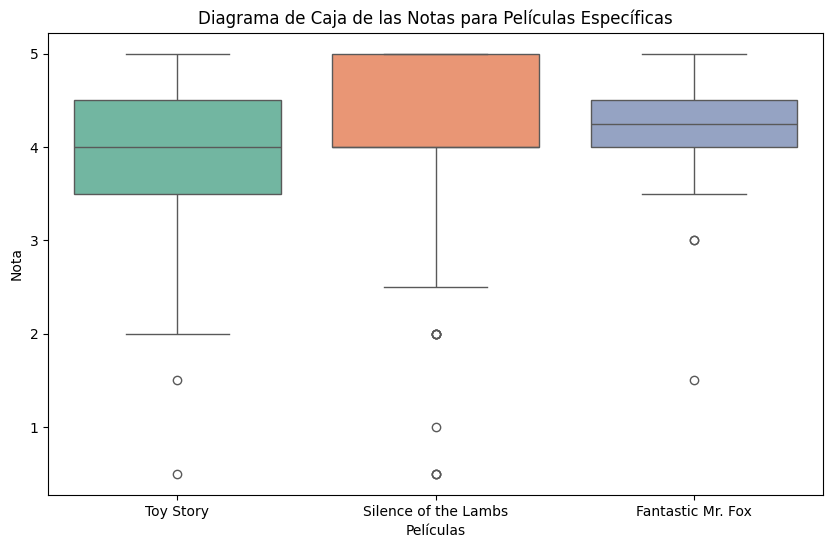

In [162]:
# Filtrar las notas para las películas específicas
notas_seleccionadas = notas.query("movieId in (1, 593, 72226)")

# Crear el diagrama de caja con una paleta de colores personalizada
plt.figure(figsize=(10, 6))
sns.boxplot(x="movieId", y="rating", data=notas_seleccionadas, palette="Set2")

# Establecer las etiquetas personalizadas para las películas en el eje x
plt.xticks(ticks=[0, 1, 2], labels=['Toy Story', 'Silence of the Lambs', 'Fantastic Mr. Fox'])

# Establecer título y etiquetas de los ejes
plt.title('Diagrama de Caja de las Notas para Películas Específicas')
plt.xlabel('Películas')
plt.ylabel('Nota')

# Mostrar el diagrama de caja
plt.show()


¿Qué podemos concluir con él? Bueno, la mediana para Silence of the Lambs y Toy Story, a simple vista parece ser 4 para ambos.

Y Fantastic Mr Fox parece tener una valoración mejor en relación a esto, pero ojo, no nos olvidemos que, ya lo habíamos dicho antes, con el gráfico de boxplot no puedo saber la cantidad de muestras, la cantidad de registros que tiene cada variable, entonces lo que vamos a hacer es, podemos hacerlo de varias formas, ya sea usando el describe de cada una o haciendo una query con groupy para saber el tamaño de cada una de esas muestras.

Vamos a usar una query para saber la cantidad.

In [163]:
notas.query("movieId in (1,593,72226)").groupby("movieId").count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


¿Qué tenemos?

* 215 registros en Toy Story
* 593 en The Silence of Lambs
* 18 en nuestra película de Fantastic Mr. Fox.

Entonces no necesariamente esto representa una realidad, es una muestra muy pequeña comparadas entre ellas, 18 en 279, no llega ni al 10% de las muestras de ellas.

Entonces, tenemos pocos datos, podemos definir mirando nuestro gráfico y mirando la cantidad de registros, tenemos pocos datos para concluir de que efectivamente Fantastic Mr. Fox es mejor que las otras dos películas.

Ahora todo esto lo podemos ver, lo podemos corroborar con nuestros test estadísticos que aprendimos en las anteriores secciones.

In [174]:
# Toy Story(1) vs Silence of the Lambs(593)
from statsmodels.stats.weightstats import DescrStatsW

descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas.query('movieId == 593').rating)

comparacion = descr_1.get_compare(descr_593)
comparacion.summary() # No se usa use_t=True por que la muestras son lo suficiente grandes

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


Silence of Lambs está mejor evaluada que Toy Story

In [175]:
# Toy Story(1) vs  Fantastic Mr. Fox(72226)
from statsmodels.stats.weightstats import DescrStatsW

descr_1 = DescrStatsW(notas1.rating)
descr_72226 = DescrStatsW(notas.query('movieId == 72226').rating)

comparacion = descr_1.get_compare(descr_72226)
comparacion.summary(use_t=True) # Aqui si usamos use_t=True por que Fantastic Mr. Fox tiene pocos datos

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


Y aquí rechazo la hipótesis nula porque mi P value es mayor que 0.05, e incluso tengo un range, un rango de seguridad aquí que es inconsistente, tengo un número negativo por un lado, un intervalo de confianza, un número negativo por un lado y un número positivo por el otro.

Entonces lo que puedo concluir es que los datos no son suficientes para decir cuál película es mejor que la otra.

In [176]:
# Silence of the Lambs(593) vs Fantastic Mr. Fox(72226)
comparacion = descr_593.get_compare(descr_72226)
comparacion.summary(use_t=True) # Aqui si usamos use_t=True por que Fantastic Mr. Fox tiene pocos datos

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0780,0.208,0.374,0.708,-0.332,0.488


¿Que me da aquí? Prácticamente valores, conclusiones parecidas un P value mayor, descarto la hipótesis nula. Y en este caso, igual, nuestro intervalo de confianza. El primer valor es negativo, el segundo valor es positivo, entonces los datos no tienen consistencia para llegar a una conclusión.

La única conclusión que podemos sacar de este análisis, una conclusión consistente es en el caso de la comparación de la primer película, que es Toy Story, con la película 593 que es The Silence of lambs. ¿Qué podríamos decir de The Silence of lambs? Fue mejor evaluada, tiene mejor valoración por los usuarios que Toy Story.

### **6.2 Comparación no paramétrica con Wilcoxon Ranksum**

Gráfico de distribución de TMBD

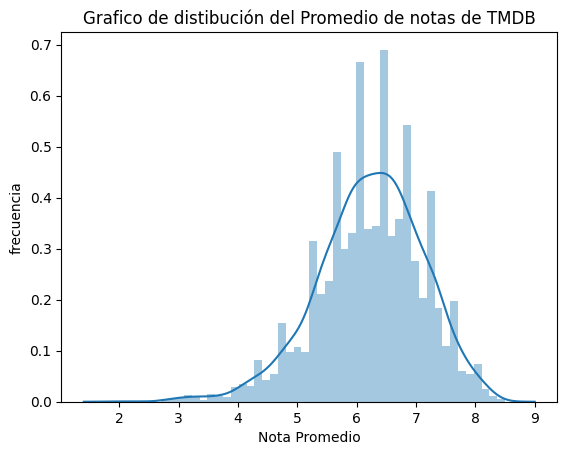

In [178]:
ax = sns.distplot(tmdb_10_o_mas_votos.vote_average)
ax.set(xlabel = "Nota Promedio", ylabel = "frecuencia")
ax.set_title("Grafico de distibución del Promedio de notas de TMDB");

Gráfico de distribución de MovieLens

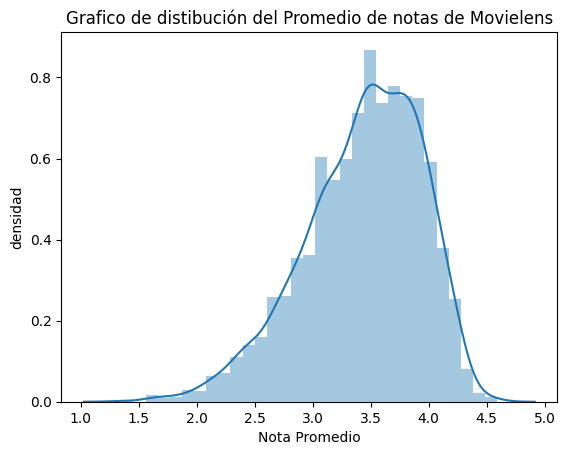

In [179]:
ax = sns.distplot(nota_promedio_por_pelicula_10_o_mas_votos.values)
ax.set(xlabel = "Nota Promedio", ylabel = "densidad")
ax.set_title("Grafico de distibución del Promedio de notas de Movielens");

Podemos concluir de que las personas normalmente dan notas buenas a las películas, buenas apreciaciones, y pasa lo mismo en MovieLens, aquí está mi media, aproximadamente mi media y mediana. Y la nota máxima está más próxima incluso aquí, la curva es un poco más acentuada hacia la izquierda. La nota máxima está más cerca, más próxima de la mediana que la nota mínima.

Entonces hay una leve sospecha de que no son normales. Para ello existe un test, para saber si son normales, recordando que el test de Z y el test T que vimos durante toda la aula son dos tests que se aplican únicamente a datos con distribuciones normales.

Y hay un test que nos indica si, de hecho, nuestra distribución que estamos estudiando se adecúa o tiene una distribución normal. Ese test se llama normaltest y está en el módulo de scipy en la biblioteca scipy.stats

* **normaltest**

In [181]:
from scipy.stats import normaltest
stat, p = normaltest(notas1.rating)
p

0.00011053430732728716

Entonces p es menor que 0.05. En este caso, rechazo la hipótesis nula. Solo aquí, recordando un poco de estadística básica, decimos que la hipótesis nula en este caso es que la distribución es normal, es una normal.

Si yo la rechazo es como ponerle un no aquí enfrente, un no aquí en la distribución no es normal. Entonces no podría en realidad usar el test T y el test Z. Para ello existe un otros tests, el que vamos a estudiar en esta parte de nuestro curso es el test de Wilcoxon

**Wilcoxon:** Es un test que usa datos no paramétricos, que no son normales, que vienen de distribuciones que no necesariamente son normales y se basa en un rankeamiento a los datos.

Analiza las distribuciones como tal, los datos como tal, no se basa en las medias, como es en el caso de Z test y el T test, se basa en la verdad, en las medias de los de los valores. Para efectos comparativos, en este caso, él compara las distribuciones y los valores aleatorios de esas distribuciones.

Entonces para usar nuestro test de Wilcoxon voy a importar de esta misma biblioteca un test que se llama ranksums. Y voy a usar prácticamente este mismo modelo, ese ranksums me devuelve un valor estadístico, un valor de p. Solo que es un test comparativo para comparar dos muestras. Entonces voy a pasar la notas1 que son de Toy Story y nuestro conjunto de datos 593 que es El silencio de los inocentes.rating.

In [182]:
from scipy.stats import ranksums
_ , p = ranksums(notas1.rating,notas.query('movieId == 593').rating)
p

0.0003267718756440693

¿En este caso, cuál era mi hipótesis nula y mi hipótesis alternativa para ranksums? Entonces solo para dejarlo claro y hacerlo más explicativo, voy a notar aquí. Nuestra hipótesis nula era que las dos muestras que son nuestros dos conjuntos de datos, tienen la misma distribución.

Y mi hipótesis alternativa es que los valores de una muestra tienden a ser mayores que de la segunda o que la otra. Entonces, como el P value en este caso fue menor que mi alpha, 0.05, lo que yo hago es rechazar, No, la hipótesis nula. Entonces, las dos muestras no tienen distribuciones iguales.

Y cuando el P value es menor que alpha, recordando que alpha es 0.05, si, H1, que es nuestra hipótesis alternativa entonces los valores de una muestra tienden a ser mayores que la otra. Los valores en este caso, como ya lo habíamos visto antes de Silence of Lambs, El Silencio de los inocentes, es mayor que Toy Story.

## **by: Jose Alfredo Ricardez Perez**